In [ ]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

## Prerequisite

In [ ]:
import keras

In [ ]:
!pip install sklearn-evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:00:00


In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
pip install plotly.express

In [ ]:
import numpy as np
import h5py
import tensorflow as tf
import pandas as pd
from pandas import DataFrame

# Data utilities
from pandas import read_csv
import matplotlib.pyplot as plt
# Data visualization
import plotly.express as px

# Machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn_evaluation import plot


Deploy Flask apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Utility Function

In [ ]:
# Utility function: plot model's accuracy and loss

# https://realpython.com/python-keras-text-classification/
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

In [ ]:
# Utility function: Display model score(Loss & Accuracy) across all sets.

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)

  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

In [ ]:
def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

In [ ]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [ ]:
def error_rate(testing_labels, predicted_testing_labels):
    from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score, classification_report, recall_score, confusion_matrix
    import numpy as np

    bootstrap_performances = list()
    performances = list()
    f1_performances = list()
    sn = list()
    sp = list()
    Y = np.array(testing_labels)  # convert list of groundtruths to numpy
    Yhat = np.array(predicted_testing_labels)  # same same for predictions
    n_samples = len(Y)  # get number of samples
    n_bootstrap = 1000  # number of bootstrap iterations

    for i in range(n_bootstrap):  # for each bootstrap draw
        subset = np.random.choice(n_samples, n_samples, replace=True)
        # create a random subset of your predictions/targets with replacement
        Y_subset = Y[subset]
        Yhat_subset = Yhat[subset]

        bootstrap_performances.append(matthews_corrcoef(Y_subset, Yhat_subset))
        performances.append(accuracy_score(Y_subset, Yhat_subset))
        f1_performances.append(f1_score(Y_subset, Yhat_subset))
        sn.append(recall_score(Y_subset, Yhat_subset))

        tn, fp, fn, tp = confusion_matrix(Y_subset, Yhat_subset).ravel()
        sp.append(tn / (tn + fp))

    sd_mcc = np.std(bootstrap_performances)  # compute std deviation over the bootstrapped performances
    sd_acc = np.std(performances)
    sd_f1 = np.std(f1_performances)
    sd_sn = np.std(sn)
    sd_sp = np.std(sp)

    print('acc:', accuracy_score(testing_labels, predicted_testing_labels))
    print('f1:', f1_score(testing_labels, predicted_testing_labels))
    print('mcc:', matthews_corrcoef(testing_labels, predicted_testing_labels))

    tn, fp, fn, tp = confusion_matrix(testing_labels, predicted_testing_labels).ravel()
    specificity = tn / (tn + fp)

    print('sn:', recall_score(testing_labels, predicted_testing_labels))
    print('sp:', specificity)
    print('sd_acc:', sd_acc)
    print('sd_f1:', sd_f1)
    print('sd_mcc:', sd_mcc)
    print('sd_sn:', sd_sn)
    print('sd_sp:', sd_sp)
    print(classification_report(testing_labels, predicted_testing_labels))

    return (sd_acc, sd_mcc, sd_f1)


In [ ]:
def conf_matrix(confusion_matrix_data):
  from mlxtend.plotting import plot_confusion_matrix
  fig, ax = plot_confusion_matrix(conf_mat =confusion_matrix_data,
                                show_absolute=True,
                                show_normed=True,
                                #display_labels=class_dict.values(),
                                colorbar=True)
  labels = ['Non-halophilic', 'Halophilic']
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.show()


In [ ]:
def mcc(clf,X,y):
  y_pred = clf.predict(X)
  mcc = matthews_corrcoef(y, y_pred)
  return mcc

In [ ]:
def std_acc(clf,X,y):
  from sklearn.metrics import accuracy_score
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append( accuracy_score(y[subset], y_pred[subset]) )
  sd_acc = np.std(bootstrap_performances)*1.96
  return sd_acc

In [ ]:
def std_f1(clf,X,y):
  from sklearn.metrics import f1_score
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append(f1_score(y[subset], y_pred[subset]) )
  sd_f1 = np.std(bootstrap_performances)*1.96
  return sd_f1

In [ ]:
def std_mcc(clf,X,y):
  from sklearn.metrics import matthews_corrcoef
  import numpy as np

  bootstrap_performances = list()
  performances = list()
  y_pred = clf.predict(X)
  Y = np.array(y) # convert list of groundtruths to numpy
  Yhat = np.array(y_pred) # same same for predictions
  n_samples = len(Y) # get number of samples
  n_bootstrap = 1000 # number of bootstrap iterations
  for i in range(n_bootstrap): # for each bootstrap draw
    subset = np.random.choice(n_samples, n_samples, replace=True)
    # create a random subset of your predictions/targets with replacement (this line will only generate the indices for list elements and the line below will grab the random subset with replacement
    bootstrap_performances.append(matthews_corrcoef(y[subset], y_pred[subset]) )
  sd_mcc = np.std(bootstrap_performances)*1.96
  return sd_mcc

## Open embedding file

In [ ]:
proteins = []
!wget https://raw.githubusercontent.com/33220311/halophilic/main/dataset/haloAdd.csv
#!wget https://raw.githubusercontent.com/33220311/halophilic/main/dataset/haloNath.csv

--2024-06-19 15:28:30--  https://raw.githubusercontent.com/33220311/halophilic/main/dataset/haloAdd.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362849 (1.3M) [text/plain]
Saving to: ‘haloAdd.csv’

haloAdd.csv         100%[===================>]   1.30M  --.-KB/s    in 0.07s   

2024-06-19 15:28:31 (19.9 MB/s) - ‘haloAdd.csv’ saved [1362849/1362849]



In [ ]:
!wget https://github.com/33220311/Extremophilic/raw/main/Embeddings/haloAdd.h5

--2024-06-19 15:28:31--  https://github.com/33220311/Extremophilic/raw/main/Embeddings/haloAdd.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/haloAdd.h5 [following]
--2024-06-19 15:28:31--  https://raw.githubusercontent.com/33220311/Extremophilic/main/Embeddings/haloAdd.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18247096 (17M) [application/octet-stream]
Saving to: ‘haloAdd.h5’

haloAdd.h5          100%[===================>]  17.40M  --.-KB/s    in 0.1s    

2024-06-19 15:28:32 (138 MB/s) - ‘haloAdd.h5’ saved [18247096/18247096]



In [ ]:
with h5py.File('haloAdd.h5', 'r') as f:
    for new_identifier in f.keys():
        proteins.append((new_identifier, np.array(f[new_identifier])))

In [ ]:
#with h5py.File('haloRed2.h5', 'r') as f:
#    for new_identifier in f.keys():
#        proteins.append((new_identifier, np.array(f[new_identifier])))

In [ ]:
#with h5py.File('halo_embds.h5', 'r') as f:
#    for new_identifier in f.keys():
#        proteins.append((new_identifier, np.array(f[new_identifier])))

In [ ]:
#with h5py.File('thermophilic_embeddings.h5', 'r') as f:
#    for new_identifier in f.keys():
#        proteins.append((new_identifier, np.array(f[new_identifier])))

In [ ]:
#with h5py.File('halophilic_embeddings.h5', 'r') as f:
#    for new_identifier in f.keys():
#        proteins.append((new_identifier, np.array(f[new_identifier])))

In [ ]:
proteins

[('17KD_RICPR',
  array([[ 0.0507  ,  0.04422 ,  0.04874 , ..., -0.01797 ,  0.012634,
          -0.0263  ]], dtype=float16)),
 ('3HAO_PSEFL',
  array([[ 0.03503 ,  0.009346,  0.03093 , ..., -0.03087 ,  0.02304 ,
           0.03967 ]], dtype=float16)),
 ('3MDO_PSEAE',
  array([[ 0.01591,  0.01863, -0.0296 , ..., -0.0056 , -0.01912,  0.0237 ]],
        dtype=float16)),
 ('5C1CA',
  array([[-0.0231  , -0.00796 ,  0.0429  , ...,  0.006405,  0.00494 ,
          -0.002222]], dtype=float16)),
 ('6H82D',
  array([[ 0.0531 ,  0.06793,  0.02309, ...,  0.0322 ,  0.0666 , -0.00908]],
        dtype=float16)),
 ('6OJ0_Z',
  array([[ 0.04663,  0.03262,  0.02162, ..., -0.03275,  0.07367,  0.03656]],
        dtype=float16)),
 ('6OJ0_f',
  array([[0.0439  , 0.011536, 0.0853  , ..., 0.0461  , 0.0455  , 0.02231 ]],
        dtype=float16)),
 ('6PGL_THEMA',
  array([[ 7.538e-02,  1.711e-05,  7.983e-02, ..., -1.578e-04,  6.598e-02,
           2.870e-02]], dtype=float16)),
 ('AAC82870',
  array([[ 0.037   , -

In [ ]:
# Basic Protocol 3 — Step 5
annotations = read_csv('haloAdd.csv')

In [ ]:
annotations[:3]

,identifier,sequence,label,set
0,QSG09462,MRFFDRLAERIDAVDSVVSVGLDPDPDRLPESVADADLPRFQFNRR...,1,train
1,QSG11440,MTRVIHTGDTHLGYQQYHEPARREDFLSAFRQVIEDAVAEDVDAVV...,1,train
2,BCB06597,MLRVAITERPQWRELAHQLGFHFHTIEGEPYWTEDAYYQFTLTQIE...,1,train


In [ ]:
# Basic Protocol 3 — Step 6
train_set = annotations[annotations.set == "train"]
test_set = annotations[annotations.set == "test"]

In [ ]:
print(f"The train set contains {len(train_set)} samples, and we will test on {len(test_set)} samples.")

The train set contains 5670 samples, and we will test on 1356 samples.


In [ ]:
# Basic Protocol 3 — Step 7

training_embeddings = list()
training_identifiers = train_set.identifier.values
training_labels = train_set.label.values
print(len(training_identifiers))
print(len(training_labels))

5670
5670


In [ ]:
#train_set.identifier.values

In [ ]:
testing_embeddings = list()
testing_identifiers = test_set.identifier.values
testing_labels = test_set.label.values
print(len(testing_identifiers))
print(len(testing_labels))

1356
1356


In [ ]:
seq = dict(proteins)
delete = list()

In [ ]:
for identifier in training_identifiers:
        if identifier in seq:
            embedding = seq[identifier]
            training_embeddings.append(embedding)
        else:
          delete.append(identifier)

In [ ]:
for identifier in testing_identifiers:
        if identifier in seq:
            embedding = seq[identifier]
            testing_embeddings.append(embedding)
        else:
          delete.append(identifier)

In [ ]:
np.where(testing_identifiers=='AAC82940')

(array([], dtype=int64),)

In [ ]:
#testing_identifiers = np.delete(testing_identifiers,0)
#testing_labels = np.delete(testing_labels,0)

In [ ]:
# A sanity check: make sure that the numbers are equal!
assert(len(training_identifiers) == len(training_embeddings))
assert(len(testing_identifiers) == len(testing_embeddings))

In [ ]:
#training_embeddings[:3]

In [ ]:
#training_identifiers

In [ ]:
len(delete)

0

In [ ]:
delete

[]

## Training

In [ ]:
arr_train = np.array(training_embeddings)
nsample, nx, ny = arr_train.shape
train_dataset = arr_train.reshape((nsample, nx*ny))
train_dataset.shape

(5670, 1024)

In [ ]:
arr_test = np.array(testing_embeddings)
nsample, nx, ny = arr_test.shape
test_dataset = arr_test.reshape((nsample, nx*ny))
test_dataset.shape

(1356, 1024)

### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, recall_score

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
lr = LogisticRegression()
lr_history = lr.fit(train_dataset, training_labels)
lr.score(test_dataset,testing_labels)

0.9166666666666666

In [ ]:
#grid_scorer = {'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}
grid_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef, greater_is_better=True),
    'sensitivity': make_scorer(recall_score, greater_is_better=True),
    'specificity': make_scorer(specificity_score, greater_is_better=True)
}

In [ ]:
scores = cross_validate(lr, train_dataset, training_labels, cv=10, scoring=grid_scorer)
scores

{'fit_time': array([0.28014112, 0.25235176, 0.39020586, 0.20420432, 0.40042663,
        0.38557482, 0.32178807, 0.29788184, 0.18996334, 0.29649019]),
 'score_time': array([0.01524138, 0.01035142, 0.01155972, 0.01208377, 0.02999878,
        0.01018643, 0.01033807, 0.01037693, 0.01932526, 0.01058984]),
 'test_accuracy': array([0.84479718, 0.8659612 , 0.95238095, 0.9382716 , 0.94708995,
        0.98412698, 0.90299824, 0.91534392, 0.88183422, 0.94885362]),
 'test_f1': array([0.88359788, 0.9047619 , 0.96423841, 0.95351926, 0.96      ,
        0.98820446, 0.93133583, 0.94044665, 0.91309987, 0.96361355]),
 'test_mcc': array([0.65203863, 0.68429547, 0.89466205, 0.86374325, 0.88477898,
        0.96433104, 0.77371057, 0.80466699, 0.72853382, 0.88455614]),
 'test_sensitivity': array([0.86753247, 0.93766234, 0.94545455, 0.93246753, 0.93506494,
        0.97922078, 0.96883117, 0.98441558, 0.91428571, 1.        ]),
 'test_specificity': array([0.7967033 , 0.71428571, 0.96703297, 0.95054945, 0.97252747

In [ ]:
predicted_training_labels = lr.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 0.9400352733686067
f1: 0.9561629706034038
mcc: 0.8615548281853282
sn: 0.9633671083398285
sp: 0.8907193849533224
sd_acc: 0.00306910616799386
sd_f1: 0.0022977659036415785
sd_mcc: 0.007118133792628047
sd_sn: 0.0029367463448052547
sd_sp: 0.007103684625377653
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1821
           1       0.95      0.96      0.96      3849

    accuracy                           0.94      5670
   macro avg       0.93      0.93      0.93      5670
weighted avg       0.94      0.94      0.94      5670



(0.00306910616799386, 0.007118133792628047, 0.0022977659036415785)

In [ ]:
predicted_testing_labels = lr.predict(test_dataset)
accuracy = accuracy_score(testing_labels, predicted_testing_labels)

print(f"Our model has an accuracy of {accuracy:.2}")

Our model has an accuracy of 0.92


In [ ]:
error_rate(testing_labels, predicted_testing_labels)

acc: 0.9166666666666666
f1: 0.951356005165734
mcc: 0.661622415311926
sn: 0.9452523524379812
sp: 0.7379679144385026
sd_acc: 0.007277948499593558
sd_f1: 0.004414707382146375
sd_mcc: 0.02932068155882423
sd_sn: 0.006736633390781546
sd_sp: 0.03265649496772899
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       187
           1       0.96      0.95      0.95      1169

    accuracy                           0.92      1356
   macro avg       0.82      0.84      0.83      1356
weighted avg       0.92      0.92      0.92      1356



(0.007277948499593558, 0.02932068155882423, 0.004414707382146375)

In [ ]:
df =pd.DataFrame(train_dataset)
df.to_excel('/content/t5_train_dataset.xlsx')
df =pd.DataFrame(training_labels)
df.to_excel('/content/t5_training_labels.xlsx')
df =pd.DataFrame(predicted_training_labels)
df.to_excel('/content/t5_pred_train_labels.xlsx')

df =pd.DataFrame(test_dataset)
df.to_excel('/content/t5_test_dataset.xlsx')
df =pd.DataFrame(testing_labels)
df.to_excel('/content/t5_testing_labels.xlsx')
df =pd.DataFrame(predicted_testing_labels)
df.to_excel('/content/t5_pred_test_labels.xlsx')

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_testing_labels, labels=classes)
conf_matrix(confusion_matrix_data)

In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

In [ ]:
sn = TP / float(TP + FN)
print(sn)
sp = TN / float(TN + FP)
print(sp)

In [ ]:
#lr.save_weights('/result/LR.h5')
print(lr.coef_.shape)
lr_weights = lr.coef_
print(lr_weights)
print(np.max(lr_weights))
print(np.min(lr_weights))

### MLP with Grid Search

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
# Basic Protocol 3 — Step 8

multilayerperceptron = MLPClassifier(solver='lbfgs', random_state=10, max_iter=1000)

parameters = {
    'hidden_layer_sizes': [((32),)],
    #'learning_rate_init': [0.001, 0.0001, 0.01],
    'solver':['adam'],
}

In [ ]:
#grid_scorer = {'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}
grid_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef, greater_is_better=True),
    'sensitivity': make_scorer(recall_score, greater_is_better=True),
    'specificity': make_scorer(specificity_score, greater_is_better=True)
}

In [ ]:
# Basic Protocol 3 — Step 9

classifiers = GridSearchCV(multilayerperceptron, parameters, cv=10, scoring=grid_scorer, refit='mcc')
history = classifiers.fit(train_dataset, training_labels)
classifier = classifiers.best_estimator_

In [ ]:
params = classifier.get_params()
params

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (32,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
import pandas as pd
from pandas import DataFrame

In [ ]:
DataFrame(classifiers.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_solver,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split3_test_specificity,split4_test_specificity,split5_test_specificity,split6_test_specificity,split7_test_specificity,split8_test_specificity,split9_test_specificity,mean_test_specificity,std_test_specificity,rank_test_specificity
0,34.047645,7.983818,0.025004,0.008223,"(32,)",adam,"{'hidden_layer_sizes': (32,), 'solver': 'adam'}",0.816578,0.858907,0.940035,...,0.972527,0.972527,0.983516,0.824176,0.741758,0.82967,0.808743,0.859995,0.101416,1


In [ ]:
df =pd.DataFrame(classifiers.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/HaloMLPRev.xlsx')


In [ ]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 1.0
f1: 1.0
mcc: 1.0
sn: 1.0
sp: 1.0
sd_acc: 0.0
sd_f1: 0.0
sd_mcc: 0.0
sd_sn: 0.0
sd_sp: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1821
           1       1.00      1.00      1.00      3849

    accuracy                           1.00      5670
   macro avg       1.00      1.00      1.00      5670
weighted avg       1.00      1.00      1.00      5670



(0.0, 0.0, 0.0)

In [ ]:
# Basic Protocol 3 — Step 10
predicted_mlp = classifier.predict(test_dataset)
accuracy = accuracy_score(testing_labels, predicted_mlp)
error_rate(testing_labels, predicted_mlp)

acc: 0.8923303834808259
f1: 0.9363557105492589
mcc: 0.59249245167194
sn: 0.9187339606501284
sp: 0.7272727272727273
sd_acc: 0.008231167889748727
sd_f1: 0.0051357567160452795
sd_mcc: 0.02963649346061585
sd_sn: 0.007957908878732378
sd_sp: 0.032206966420659754
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       187
           1       0.95      0.92      0.94      1169

    accuracy                           0.89      1356
   macro avg       0.77      0.82      0.79      1356
weighted avg       0.90      0.89      0.90      1356



(0.008231167889748727, 0.02963649346061585, 0.0051357567160452795)

In [ ]:
df =pd.DataFrame(train_dataset)
df.to_excel('/content/mlp_train_dataset.xlsx')
df =pd.DataFrame(training_labels)
df.to_excel('/content/mlp_training_labels.xlsx')
df =pd.DataFrame(predicted_training_labels)
df.to_excel('/content/mlp_pred_train_labels.xlsx')

df =pd.DataFrame(test_dataset)
df.to_excel('/content/mlp_test_dataset.xlsx')
df =pd.DataFrame(testing_labels)
df.to_excel('/content/mlp_testing_labels.xlsx')
df =pd.DataFrame(predicted_mlp)
df.to_excel('/content/mlp_pred_test_labels.xlsx')

In [ ]:
from pandas import DataFrame
cv_results = DataFrame(classifiers.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      34.047645      7.983818         0.025004        0.008223   

  param_hidden_layer_sizes param_solver  \
0                    (32,)         adam   

                                            params  split0_test_accuracy  \
0  {'hidden_layer_sizes': (32,), 'solver': 'adam'}              0.816578   

   split1_test_accuracy  split2_test_accuracy  ...  split3_test_specificity  \
0              0.858907              0.940035  ...                 0.972527   

   split4_test_specificity  split5_test_specificity  split6_test_specificity  \
0                 0.972527                 0.983516                 0.824176   

   split7_test_specificity  split8_test_specificity  split9_test_specificity  \
0                 0.741758                  0.82967                 0.808743   

   mean_test_specificity  std_test_specificity  rank_test_specificity  
0               0.859995              0.101416                      1  


In [ ]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

<ipython-input-12-286145be1eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-12-286145be1eb1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


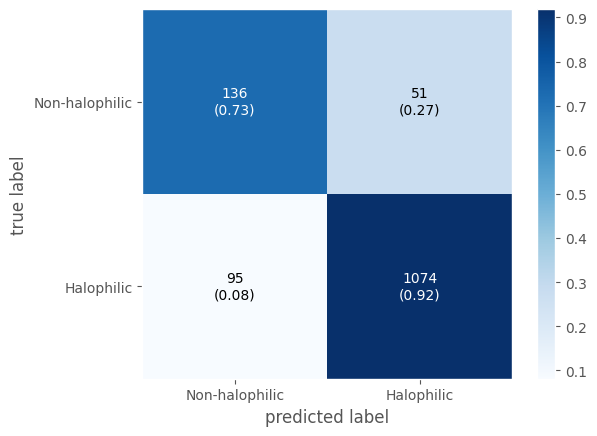

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_mlp, labels=classes)
conf_matrix(confusion_matrix_data)

In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

print(TP,TN, FP, FN)

sn = TP / float(TP + FN)
print(sn)
sp = TN / float(TN + FP)
print(sp)

1074 136 51 95
0.9187339606501284
0.7272727272727273


### CNN with GridSearch

In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from time import time

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
n_timesteps, n_features, n_outputs =train_dataset.shape[0], train_dataset.shape[1], Y_train.shape[1]

In [ ]:
n_epochs = 30 # 30
n_epochs_cv = 10 # 10  # reduce number of epochs for cross validation for performance reason

n_cv = 10
validation_ratio = 0.10

In [ ]:
def create_cnn_model(pool_type='max', conv_activation='relu', dropout_rate=0.0, kernel=1, optimizer='adam'):
    # create model
    model = Sequential()

    # first layer: convolution
    #model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv1D(filters=128, kernel_size=kernel, activation='relu',input_shape=(n_features,1)))
    # second series of layers: convolution, pooling, and dropout
    model.add(Conv1D(32, kernel_size=kernel, activation=conv_activation))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # third series of layers: convolution, pooling, and dropout
    model.add(Conv1D(64, kernel_size=kernel, activation=conv_activation))   # 32   10
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    model.add(Conv1D(64, kernel_size=kernel, activation=conv_activation))   # 32   10
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # fourth series
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid')) # 64
    # add a dropout layer if rate is not null
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer= optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'],
        )
    return model

In [ ]:
cnn = create_cnn_model()

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1024, 128)         256       
                                                                 
 conv1d_1 (Conv1D)           (None, 1024, 32)          4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 32)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 512, 64)           2112      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 256, 64)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 256, 64)           4

In [ ]:
# optimize model
start = time()

# create model
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# define parameters and values for grid search
param_grid = {
    'pool_type': ['max','average'],
    'conv_activation': ['relu', 'tanh'],
    #'epochs': [3,5,10],
    'kernel':[1,2,3,4,5],
    'optimizer':['adam','sgd']
}

<ipython-input-71-d50523f4b107>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_cnn_model, verbose=1)


In [ ]:
#grid_scorer = {'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}
grid_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef, greater_is_better=True),
    'sensitivity': make_scorer(recall_score, greater_is_better=True),
    'specificity': make_scorer(specificity_score, greater_is_better=True)
}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, scoring=grid_scorer, refit='mcc')
grid_result = grid.fit(train_dataset, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


178/178 [==============================] - 13s 62ms/step - loss: 0.5255 - accuracy: 0.7369 - recall: 0.9350 - precision: 0.7434 - true_positives: 3599.0000 - true_negatives: 579.0000 - false_positives: 1242.0000 - false_negatives: 250.0000


In [ ]:
classifier = grid.best_estimator_
best_model = grid.best_estimator_.model
best_model.save('/content/drive/MyDrive/Halophilic/T5cnnNath.h5')

In [ ]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

178/178 [==============================] - 3s 15ms/step
acc: 0.8865961199294533
f1: 0.9162214983713356
mcc: 0.7408148355491271
sn: 0.9134840218238504
sp: 0.829763866007688
sd_acc: 0.0041102229426688945
sd_f1: 0.00319467135228275
sd_mcc: 0.009413589457963587
sd_sn: 0.004411215081085853
sd_sp: 0.008914463485109703
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1821
           1       0.92      0.91      0.92      3849

    accuracy                           0.89      5670
   macro avg       0.87      0.87      0.87      5670
weighted avg       0.89      0.89      0.89      5670



(0.0041102229426688945, 0.009413589457963587, 0.00319467135228275)

In [ ]:
predicted_cnn = classifier.predict(test_dataset)
error_rate(testing_labels, predicted_cnn)

43/43 [==============================] - 1s 15ms/step
acc: 0.8606194690265486
f1: 0.9174311926605505
mcc: 0.4764181163559633
sn: 0.8982035928143712
sp: 0.6256684491978609
sd_acc: 0.00911696335917904
sd_f1: 0.005778330298079742
sd_mcc: 0.0319598048669442
sd_sn: 0.008553428633777347
sd_sp: 0.03515271033408181
              precision    recall  f1-score   support

           0       0.50      0.63      0.55       187
           1       0.94      0.90      0.92      1169

    accuracy                           0.86      1356
   macro avg       0.72      0.76      0.74      1356
weighted avg       0.88      0.86      0.87      1356



(0.00911696335917904, 0.0319598048669442, 0.005778330298079742)

In [ ]:
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [ ]:
# summarize results
#print('time for grid search = {:.0f} sec'.format(time()-start))
#display_cv_results(grid_result)

In [ ]:
df =pd.DataFrame(grid.cv_results_)
#new_path = '/content/test.xls'
#writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/HaloCNNRev.xlsx')

In [ ]:
classifier = grid.best_estimator_

params = classifier.get_params()
params

{'verbose': 1,
 'conv_activation': 'relu',
 'kernel': 3,
 'optimizer': 'adam',
 'pool_type': 'max',
 'build_fn': <function __main__.create_cnn_model(pool_type='max', conv_activation='relu', dropout_rate=0.0, kernel=1, optimizer='adam')>}

In [ ]:
df =pd.DataFrame(train_dataset)
df.to_excel('/content/cnn_train_dataset.xlsx')
df =pd.DataFrame(training_labels)
df.to_excel('/content/cnn_training_labels.xlsx')
df =pd.DataFrame(predicted_training_labels)
df.to_excel('/content/cnn_pred_train_labels.xlsx')

df =pd.DataFrame(test_dataset)
df.to_excel('/content/cnn_test_dataset.xlsx')
df =pd.DataFrame(testing_labels)
df.to_excel('/content/cnn_testing_labels.xlsx')
df =pd.DataFrame(predicted_cnn)
df.to_excel('/content/cnn_pred_test_labels.xlsx')

In [ ]:
from pandas import DataFrame
cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_conv_activation','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

<ipython-input-12-286145be1eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-12-286145be1eb1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


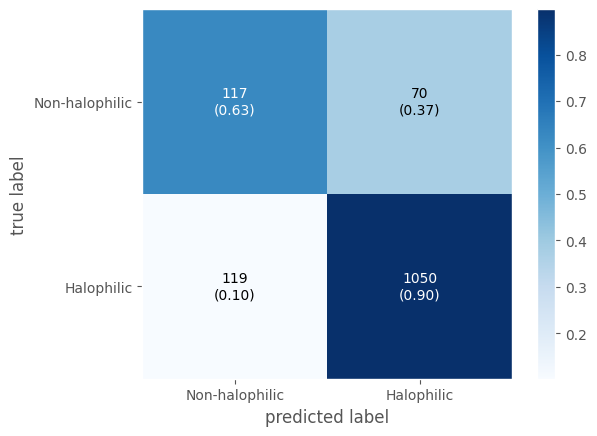

array([[ 117,   70],
       [ 119, 1050]])

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_cnn, labels=classes)
conf_matrix(confusion_matrix_data)
confusion_matrix_data

In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

In [ ]:
sn = TP / float(TP + FN)
print(sn)

0.8982035928143712


In [ ]:
sp = TN / float(TN + FP)
print(sp)

### RNN with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer, GRU
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_rnn_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    rnn = SimpleRNN(units, activity_regularizer=l2(regularizer), return_sequences = True)(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(rnn)
    rnn2 =SimpleRNN(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(rnn2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
rnn_model = create_rnn_model()
rnn_model.summary()

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_rnn_model, verbose=1, epochs=3)
# define parameters and values for grid search

parameters = {
    'units':[50,100], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['sgd','adam'],
    #'epochs':[2,3,5,10]
    'dropout_rate':[0.0,0.05, 0.1], #0.05
    'regularizer':[0.0,0.05, 0.1],
}

In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/T5RNNNath.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

In [ ]:
predicted_rnn = classifier.predict(X_test)
predicted_rnn = np.where(predicted_rnn > 0.5, 1, 0)
predicted_rnn = np.reshape(predicted_rnn,(len(predicted_rnn),)).astype(int)
error_rate(Y_test, predicted_rnn)

### GRU with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer, GRU
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_gru_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    gru = GRU(units, activity_regularizer=l2(regularizer), return_sequences = True)(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(gru)
    gru2 =GRU(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(gru2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
gru_model = create_gru_model()
gru_model.summary()

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_gru_model, verbose=1, batch_size = 256)
# define parameters and values for grid search

parameters = {
    'units':[50,100], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['adam','sgd'],
    #'epochs':[3,5,10]
    'dropout_rate':[0.0,0.05, 0.1], #0.05
    'regularizer':[0.0,0.05, 0.1],
}

In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/T5GRUNath.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

In [ ]:
predicted_gru = classifier.predict(X_test)
predicted_gru = np.where(predicted_gru > 0.5, 1, 0)
predicted_gru = np.reshape(predicted_gru,(len(predicted_gru),)).astype(int)
error_rate(Y_test, predicted_gru)

### LSTM with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_lstm_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    lstm = LSTM(units, activity_regularizer=l2(regularizer))(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(lstm)
    #lstm2 =LSTM(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    #x2 = Dropout(dropout_rate)(lstm2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=solver,#tf.keras.optimizers.Adam(learning_rate=learning_rate_init),
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
lstm_model = create_lstm_model()
lstm_model.summary()

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_lstm_model, verbose=1)
# define parameters and values for grid search

parameters = {
    'units':[50,100], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['adam','sgd'],
    #'epochs':[3,5,10],
    'dropout_rate':[0.0,0.05, 0.1], #0.05
    'regularizer':[0.0,0.05, 0.1],
}

In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/T5LSTMNath.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

In [ ]:
predicted_lstm = classifier.predict(X_test)
predicted_lstm = np.where(predicted_lstm > 0.5, 1, 0)
predicted_lstm = np.reshape(predicted_lstm,(len(predicted_lstm),)).astype(int)
error_rate(Y_test, predicted_lstm)

### BiLSTM with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from time import time

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
input_shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
num_words = 22
num_classes = 1
n_cv = 3
num_hiddens = 1280
num_steps = 10
num_layers = 1
max_length = 2560

In [ ]:
def create_blstm_model1(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    bi_rnn = Bidirectional(LSTM(units, activity_regularizer=l2(dropout_rate),return_sequences=True))(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(bi_rnn)
    bi_rnn2 = Bidirectional(LSTM(units, activity_regularizer=l2(dropout_rate)))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(bi_rnn2)
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
#blstm = create_blstm_model()
blstm1 = create_blstm_model1()

In [ ]:
#blstm.summary()
blstm1.summary()

In [ ]:
# Early Stopping
#es = EarlyStopping(monitor='val_loss', patience=150, verbose=1)

#history = blstm1.fit(train_pad, y_train,
#                        validation_data=(val_pad, y_val),
#                        callbacks=[es],
#                        epochs=3, batch_size=256, verbose=1
#                        )

In [ ]:
#predicted_training_labels = blstm1.predict(train_pad)
#predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
#predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
#error_rate(y_train, predicted_training_labels)

In [ ]:
#predicted_testing_labels = blstm1.predict(val_pad)
#predicted_testing_labels = np.where(predicted_testing_labels > 0.5, 1, 0)
#predicted_testing_labels = np.reshape(predicted_testing_labels,(len(predicted_testing_labels),)).astype(int)
#error_rate(y_val, predicted_testing_labels)

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_blstm_model1, verbose=1)
# define parameters and values for grid search

parameters = {
    'units':[50,100],
    #'learning_rate_init': [0.001, 0.01],
    #'epochs': [2,3,5,10],
    'solver':['adam','sgd'],
    #'dropout_rate':[0.0,0.05, 0.1],
    #'regularizer':[0.0,0.05, 0.1],
}

In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_activation','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/T5BLSTMNath.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

In [ ]:
predicted_blstm = classifier.predict(X_test)
predicted_blstm = np.where(predicted_blstm > 0.5, 1, 0)
predicted_blstm = np.reshape(predicted_blstm,(len(predicted_blstm),)).astype(int)
error_rate(Y_test, predicted_blstm)

In [ ]:
classes = np.unique(Y_test)

confusion_matrix_data = confusion_matrix(Y_test, predicted_blstm, labels=classes)
conf_matrix(confusion_matrix_data)
confusion_matrix_data

# CapsNet



In [ ]:
def load_data_embedding():
    SEED = 42
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    # the data, shuffled and split between train and test sets

    # create train dataset

    arr_train = np.array(training_embeddings)
    nsample, nx, ny = arr_train.shape
    train_dataset = arr_train.reshape((nsample, nx*ny))


    # create test dataset

    arr_test = np.array(testing_embeddings)
    nsample, nx, ny = arr_test.shape
    test_dataset = arr_test.reshape((nsample, nx*ny))



    # encode labels
    labels_train_encoded = to_categorical(
        training_labels, num_classes=2, dtype="float32"
    )  # (14189, 2)
    labels_test_encoded = to_categorical(
        testing_labels, num_classes=2, dtype="float32"
    )  # (2272, 2)



    return train_dataset, labels_train_encoded, test_dataset, labels_test_encoded

## Persiapan

In [ ]:
import datetime
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer,
    LSTM,
    Bidirectional,
    Embedding,
    Dense,
    Dropout,
    Flatten,
    Convolution1D,
    MaxPooling1D,
    BatchNormalization,
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
from typing import List, Tuple

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


def create_dataset(data_path: str) -> Tuple[List[str], List[int]]:
    dataset = pd.read_csv(data_path)
    dataset = dataset.sample(frac=1).reset_index(drop=True)  # shuffle the dataset
    return list(dataset["sequence"]), list(dataset["label"])


def split_dataset(
    sequences_list: List[str], labels_list: List[int], train_size: float = 0.8
) -> Tuple[List[str], List[str], List[str], List[int], List[int], List[int]]:
    dataset = pd.DataFrame({"sequence": sequences_list, "label": labels_list})
    dataset = dataset.sample(frac=1, random_state=1)
    train, remaining = train_test_split(dataset, train_size=train_size, random_state=2)
    valid, test = train_test_split(remaining, test_size=0.5, random_state=3)
    x_train, x_valid, x_test = train["sequence"], valid["sequence"], test["sequence"]
    y_train, y_valid, y_test = train["label"], valid["label"], test["label"]
    return (
        list(x_train),
        list(x_valid),
        list(x_test),
        list(y_train),
        list(y_valid),
        list(y_test),
    )


def one_hot_encoding(
    sequence: str,
    max_seq_length: int = 1000,
    CONSIDERED_AA: str = "ACDEFGHIKLMNPQRSTVWY",
):
    # adapt sequence size
    if len(sequence) > max_seq_length:
        # short the sequence
        sequence = sequence[:max_seq_length]
    else:
        # pad the sequence
        sequence = sequence + "." * (max_seq_length - len(sequence))

    # encode sequence
    encoded_sequence = np.zeros((max_seq_length, len(CONSIDERED_AA)))  # (1000, 20)
    for i, amino_acid in enumerate(sequence):
        if amino_acid in CONSIDERED_AA:
            encoded_sequence[i][CONSIDERED_AA.index(amino_acid)] = 1
    model_input = np.expand_dims(encoded_sequence, 0)  # add batch dimension

    return model_input  # (1, 1000, 20)


def preprocess_word_embedding_encoding(
    sequence: str,
    max_seq_length: int = 1000,
    CONSIDERED_AA: str = "ACDEFGHIKLMNPQRSTVWY",
):
    # amino acids encoding
    aa_mapping = {aa: i + 1 for i, aa in enumerate(CONSIDERED_AA)}

    # adapt sequence size
    if len(sequence) > max_seq_length:
        # short the sequence
        sequence = sequence[:max_seq_length]
    else:
        # pad the sequence
        sequence = sequence + "." * (max_seq_length - len(sequence))

    # encode sequence
    encoded_sequence = np.zeros((max_seq_length,))  # (1000,)
    for i, amino_acid in enumerate(sequence):
        if amino_acid in CONSIDERED_AA:
            encoded_sequence[i] = aa_mapping[amino_acid]
    model_input = np.expand_dims(encoded_sequence, 0)  # add batch dimension

    return model_input  # (1, 1000)

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

def f1_score_metric(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float32'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1



def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)


def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())


def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

## Capsule Network

In [ ]:
from keras.backend import *
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops


#own_batch_dot = batch_dot  # force standard implementation

# import of batch_dot operation from TF 1.13
# https://github.com/tensorflow/tensorflow/blob/v1.13.1/tensorflow/python/keras/backend.py

def own_batch_dot(x, y, axes=None):
  if isinstance(axes, int):
    axes = (axes, axes)
  x_ndim = ndim(x)
  y_ndim = ndim(y)
  if axes is None:
    # behaves like tf.batch_matmul as default
    axes = [x_ndim - 1, y_ndim - 2]
  if x_ndim > y_ndim:
    diff = x_ndim - y_ndim
    y = array_ops.reshape(y,
                          array_ops.concat(
                              [array_ops.shape(y), [1] * (diff)], axis=0))
  elif y_ndim > x_ndim:
    diff = y_ndim - x_ndim
    x = array_ops.reshape(x,
                          array_ops.concat(
                              [array_ops.shape(x), [1] * (diff)], axis=0))
  else:
    diff = 0
  if ndim(x) == 2 and ndim(y) == 2:
    if axes[0] == axes[1]:
      out = math_ops.reduce_sum(math_ops.multiply(x, y), axes[0])
    else:
      out = math_ops.reduce_sum(
          math_ops.multiply(array_ops.transpose(x, [1, 0]), y), axes[1])
  else:
    adj_x = None if axes[0] == ndim(x) - 1 else True
    adj_y = True if axes[1] == ndim(y) - 1 else None
    out = math_ops.matmul(x, y, adjoint_a=adj_x, adjoint_b=adj_y)
  if diff:
    if x_ndim > y_ndim:
      idx = x_ndim + y_ndim - 3
    else:
      idx = x_ndim - 1
    out = array_ops.squeeze(out, list(range(idx, idx + diff)))
  if ndim(out) == 1:
    out = expand_dims(out, 1)
  return out

In [ ]:

import keras.backend as K
import tensorflow as tf
from keras import initializers, layers

class Length(layers.Layer):

    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1))

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]


class Mask(layers.Layer):

    def call(self, inputs, **kwargs):
        if type(inputs) is list:  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, mask = inputs
        else:  # if no true label, mask by the max length of capsules. Mainly used for prediction
            # compute lengths of capsules
            x = K.sqrt(K.sum(K.square(inputs), -1))
            # generate the mask which is a one-hot code.
            # mask.shape=[None, n_classes]=[None, num_capsule]
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=tf.shape(x)[1])

        # inputs.shape=[None, num_capsule, dim_capsule]
        # mask.shape=[None, num_capsule]
        # masked.shape=[None, num_capsule * dim_capsule]
        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])


def squash(vectors, axis=-1):

    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors


class CapsuleLayer(layers.Layer):

    def __init__(self, num_capsule, dim_capsule, num_routing=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.num_routing = num_routing
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=(self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule),
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.built = True

    def call(self, inputs, training=None):
        # inputs.shape=[None, input_num_capsule, input_dim_capsule]
        # inputs_expand.shape=[None, 1, input_num_capsule, input_dim_capsule]
        inputs_expand = K.expand_dims(inputs, 1)

        # Replicate num_capsule dimension to prepare being multiplied by W
        # inputs_tiled.shape=[None, num_capsule, input_num_capsule, input_dim_capsule]
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsule, 1, 1])

        # Compute `inputs * W` by scanning inputs_tiled on dimension 0.
        # x.shape=[num_capsule, input_num_capsule, input_dim_capsule]
        # W.shape=[num_capsule, input_num_capsule, dim_capsule, input_dim_capsule]
        # Regard the first two dimensions as `batch` dimension,
        # then matmul: [input_dim_capsule] x [dim_capsule, input_dim_capsule]^T -> [dim_capsule].
        # inputs_hat.shape = [None, num_capsule, input_num_capsule, dim_capsule]
        inputs_hat = K.map_fn(lambda x: own_batch_dot(x, self.W, [2, 3]), elems=inputs_tiled)


        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # In forward pass, `inputs_hat_stopped` = `inputs_hat`;
        # In backward, no gradient can flow from `inputs_hat_stopped` back to `inputs_hat`.
        inputs_hat_stopped = K.stop_gradient(inputs_hat)

        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].
        b = tf.zeros(shape=(K.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule))

        assert self.num_routing > 0, 'The num_routing should be > 0.'
        for i in range(self.num_routing):
            # c.shape=[batch_size, num_capsule, input_num_capsule]
            c = tf.nn.softmax(b, axis=1)

            # At last iteration, use `inputs_hat` to compute `outputs` in order to backpropagate gradient
            if i == self.num_routing - 1:
                # c.shape =  [batch_size, num_capsule, input_num_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [input_num_capsule] x [input_num_capsule, dim_capsule] -> [dim_capsule].
                # outputs.shape=[None, num_capsule, dim_capsule]
                outputs = squash(own_batch_dot(c, inputs_hat, [2, 2]))  # [None, 10, 16]
            else:  # Otherwise, use `inputs_hat_stopped` to update `b`. No gradients flow on this path.
                outputs = squash(own_batch_dot(c, inputs_hat_stopped, [2, 2]))

                # outputs.shape =  [None, num_capsule, dim_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [dim_capsule] x [input_num_capsule, dim_capsule]^T -> [input_num_capsule].
                # b.shape=[batch_size, num_capsule, input_num_capsule]
                b += own_batch_dot(outputs, inputs_hat_stopped, [2, 3])
        # End: Routing algorithm -----------------------------------------------------------------------#

        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])


def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding):

    output = layers.Conv1D(filters=dim_capsule*n_channels, kernel_size=kernel_size, strides=strides, padding=padding,
                           name='primarycap_conv2d')(inputs)
    outputs = layers.Reshape(target_shape=[-1, dim_capsule], name='primarycap_reshape')(output)
    return layers.Lambda(squash, name='primarycap_squash')(outputs)

In [ ]:

import numpy as np
import json
from keras import layers, models, optimizers
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from tensorflow.keras.utils import to_categorical
# from capsulelayers import CapsuleLayer, PrimaryCap, Length, Mask

#%%

def CapsNet(input_shape,top_words, maxlen, n_class, routings):

    x = layers.Input(shape=input_shape)
    conv1 = layers.Conv1D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)
    # Layer 2: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
    primarycaps = PrimaryCap(conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

    # Layer 3: Capsule layer. Routing algorithm works here.
    digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=8, num_routing=routings,
                             name='digitcaps')(primarycaps)

    # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
    # If using tensorflow, this will not be necessary. :)
    out_caps = Length(name='capsnet')(digitcaps)

    # Decoder network.
    y = layers.Input(shape=(n_class,))
    masked_by_y = Mask()([digitcaps, y])  # The true label is used to mask the output of capsule layer. For training
    masked = Mask()(digitcaps)  # Mask using the capsule with maximal length. For prediction

    # Shared Decoder model in training and prediction
    decoder = models.Sequential(name='decoder')
    dec_3 = decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid', input_dim=10*n_class))
#    dec_1 = decoder.add(layers.Dense(16, activation='relu', input_dim=10*n_class))
#    dec_2 = decoder.add(layers.Dense(16, activation='relu'))
#    decoder.add(layers.Dropout(0.40))
#    dec_3 = decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
    dec_4 = decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))

    # Models for training and evaluation (prediction)
    train_model = models.Model(x,out_caps) #masked_by_y
    eval_model = models.Model(x, [out_caps, decoder(masked)])

    # manipulate model
    # noise = layers.Input(shape=(n_class, 10))
    # noised_digitcaps = layers.Add()([digitcaps, noise])
    # masked_noised_y = Mask()([noised_digitcaps, y])
    # manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))
    # return train_model, eval_model, manipulate_model
    return train_model, eval_model


def margin_loss(y_true, y_pred):

    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))

    return K.mean(K.sum(L, 1))


## Persiapan Kfold

In [ ]:
X_train,y_train,X_test,y_test = load_data_embedding()

In [ ]:
X_train[:,1].shape

(5670,)

In [ ]:
# split into samples (e.g. 14188/1 = 14188)
samples_train = list()
length = 1
n=5670
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
 # grab from i to i + 200
 sample_train = X_train[i:i+length]
 samples_train.append(sample_train)
print(len(samples_train))

5670


In [ ]:
samples_test = list()
length = 1
n=1356
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
 # grab from i to i + 200
 sample_test = X_test[i:i+length]
 samples_test.append(sample_test)
print(len(samples_test))

1356


In [ ]:
# convert list of arrays into 2d array
from numpy import array
data_train = array(samples_train)
data_test = array(samples_test)
print(data_train.shape)
print(data_test.shape)

(5670, 1, 1024)
(1356, 1, 1024)


In [ ]:
# data_train = data_train.reshape((len(samples_train), 32, 32))
# data_test = data_test.reshape((len(samples_test), 32, 32))

In [ ]:
data_train = data_train.reshape((len(samples_train), 1024,1))
data_test = data_test.reshape((len(samples_test), 1024, 1))
print(data_train.shape)
print(data_test.shape)

(5670, 1024, 1)
(1356, 1024, 1)


In [ ]:
train_dataset[1000].shape

(1024,)

In [ ]:
data_train.shape

(5670, 1024, 1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
inputs = np.concatenate((data_train, data_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
print(inputs.shape)
print(targets.shape)

(7026, 1024, 1)
(7026, 2)


## Training Capsule Network

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files
from keras.layers import LeakyReLU, Dense, Input, Embedding, Dropout, Bidirectional, GRU, Flatten, SpatialDropout1D, concatenate,LSTM,Conv1D

acc_per_fold = []
loss_per_fold = []
sp_per_fold = []
prec_per_fold = []
sn_per_fold = []
AUC_per_fold = []
MCC_per_fold = []
f1_per_fold = []

tprs = []

aucs = []
conf_matrix_list_of_arrays = []

mean_fpr = np.linspace(0, 1, 100)
i = 1
fig, ax = plt.subplots()

# seed = 7
# np.random.seed(seed)

epoch=30
# unpacking the data
# (x_train, y_train), (x_test, y_test) = data

# set amino acids to consider
CONSIDERED_AA = "ACDEFGHIKLMNPQRSTVWY"

# embedding and convolution parameters
MAX_SEQ_LENGTH = 1024
VOCAB_SIZE = len(CONSIDERED_AA)
# EMBEDDING_SIZE = 128
# plt.figure(1)
plt.figure(figsize=(6,6), dpi= 1000)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):


  model, eval_model = CapsNet(data_train[1,:].shape, VOCAB_SIZE, MAX_SEQ_LENGTH, n_class=2, routings=2)
  model.summary()

   # compile the model
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=[margin_loss, 'binary_crossentropy'],
                  # loss_weights=[1., 0.392],
                  metrics=["accuracy", specificity, "Precision", "Recall", "AUC", matthews_correlation_coefficient, f1_score_metric])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=128,
              epochs=epoch,
              # validation_split=0.05,
              verbose=1)
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%; {model.metrics_names[2]} of {scores[2]}; {model.metrics_names[3]} of {scores[3]}; {model.metrics_names[4]} of {scores[4]}; {model.metrics_names[5]} of {scores[5]}; {model.metrics_names[6]} of {scores[6]}; {model.metrics_names[7]} of {scores[7]}')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  sp_per_fold.append(scores[2])
  prec_per_fold.append(scores[3])
  sn_per_fold.append(scores[4])
  AUC_per_fold.append(scores[5])
  MCC_per_fold.append(scores[6])
  f1_per_fold.append(scores[7])

  y_pred_keras = model.predict(inputs[test])

  conf_matrix = confusion_matrix(targets[test].argmax(axis=1), y_pred_keras.argmax(axis=1))
  conf_matrix_list_of_arrays .append(conf_matrix)

  fpr, tpr, thresholds = roc_curve(targets[test].ravel(), y_pred_keras.ravel())
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)

  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))


  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Specificity: {sp_per_fold[i]} - Precision: {prec_per_fold[i]} - Sensitivity: {sn_per_fold[i]} - AUC: {AUC_per_fold[i]} - MCC: {MCC_per_fold[i]} - F1 Score: {f1_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Specificity: {np.mean(sp_per_fold)}(+- {np.std(sp_per_fold)})')
print(f'> Precision: {np.mean(prec_per_fold)}(+- {np.std(prec_per_fold)})')
print(f'> Sensitivity: {np.mean(sn_per_fold)}(+- {np.std(sn_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)}')
print(f'> MCC: {np.mean(MCC_per_fold)}(+- {np.std(MCC_per_fold)})')
print(f'> F1 Score: {np.mean(f1_per_fold)} (+- {np.std(f1_per_fold)})')
print('------------------------------------------------------------------------')

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
# image = plt.figure(figsize=(16,10), dpi= 200)

plt.savefig("Halo_capsNet.JPG",dpi=1000)
plt.show()

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
# plt.savefig("DPB",dpi=500)
# tf.keras.models.save_model(model, filepath="/gdrive/MyDrive/DNA Binding Protein/Dbp app/logs3/model blstm Adam 100 epoch reduce plateu one hot 128 sequence 600",save_format='hdf5')

Instructions for updating:
Use fn_output_signature instead


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1 (Conv1D)              (None, 1016, 256)         2560      
                                                                 
 primarycap_conv2d (Conv1D)  (None, 504, 256)          590080    
                                                                 
 primarycap_reshape (Reshap  (None, 16128, 8)          0         
 e)                                                              
                                                                 
 primarycap_squash (Lambda)  (None, 16128, 8)          0         
                                                                 
 digitcaps (CapsuleLayer)    (None, 2, 8)              2064384   
                                                             

In [ ]:
# Extracting weights from the CapsuleLayer named 'digitcaps'
capsule_layer = model.get_layer('digitcaps')
capsule_weights = capsule_layer.get_weights()
capsule_weights = np.array(capsule_weights)

print("Capsule Weights:", capsule_weights)
#print(capsule_weights.shape)
# Extracting weights from the final Dense layer of the decoder
#decoder_final_dense_layer = decoder.layers[-2]  # The second last layer is the final Dense layer
#decoder_weights = decoder_final_dense_layer.get_weights()
#print("Decoder Weights:", decoder_weights)
#print(decoder_weights.shape)

Capsule Weights: [[[[[-1.87365711e-02  1.90469474e-02  1.23590138e-02 ...
     -9.91970673e-03 -1.23347668e-02  9.17982217e-03]
    [ 1.45173175e-02 -1.88027155e-02 -1.42189655e-02 ...
      1.20781716e-02  1.25991143e-02 -9.88515653e-03]
    [-1.92040447e-04 -1.99138955e-03 -1.69343979e-03 ...
      4.68239561e-03  5.39083267e-03 -4.13122261e-03]
    ...
    [-1.60918187e-03  3.02869244e-03  4.22363495e-03 ...
      5.63466968e-03 -3.76739958e-03  2.75701354e-03]
    [ 1.89286973e-02 -1.42917670e-02 -1.59262326e-02 ...
      8.48493259e-03  1.40284793e-02 -8.09320621e-03]
    [-1.47713104e-03  3.88735998e-03 -2.99810432e-03 ...
      3.77755379e-04  3.56308417e-03  2.56932946e-03]]

   [[-1.53839001e-02  7.01922970e-03  1.62807014e-02 ...
     -1.24657638e-02  2.04033982e-02  1.17523717e-02]
    [ 1.38396509e-02 -1.04512237e-02 -1.68552287e-02 ...
      1.27300927e-02 -1.63304619e-02 -1.81014333e-02]
    [ 4.79727285e-03 -5.21894637e-03 -3.85912659e-04 ...
      1.16661424e-03 -3.3557

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
capsule_weights.shape

(1, 2, 16128, 8, 8)

In [ ]:
reshaped_capsule_weights = capsule_weights.reshape(-1, capsule_weights.shape[-1] * capsule_weights.shape[-2] * capsule_weights.shape[-3])

print("Reshaped shape of capsule_weights:", reshaped_capsule_weights.shape)

Reshaped shape of capsule_weights: (16, 129024)


In [ ]:
perplexity_value = min(30, reshaped_capsule_weights.shape[0] - 1)

InvalidArgumentError: {{function_node __wrapped__Min_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (1 for input with 0 dimension(s) [Op:Min]

In [ ]:
if isinstance(capsule_weights, list):
    capsule_weights = np.array(capsule_weights)

if capsule_weights.size == 0:
    raise ValueError("capsule_weights is empty. Please provide valid data.")

In [ ]:
perplexity_value = min(30, len(capsule_weights) - 1)

InvalidArgumentError: {{function_node __wrapped__Min_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid reduction dimension (0 for input with 0 dimension(s) [Op:Min]

In [ ]:
df = pd.DataFrame()
df['Target'] = training_labels
df['Target'] = df['Target'].map({0: 'Non-Halophilic', 1: 'Halophilic'})

m = TSNE(n_components=2, perplexity=1,learning_rate = 10)
tsne_features = m.fit_transform(reshaped_capsule_weights)

df['Dimension-1'] = tsne_features[:,0]
df['Dimension-2'] = tsne_features[:,1]
plt.text(-14.5, 5,"(b)", fontsize=15)
sns.scatterplot(x="Dimension-1",y="Dimension-2",hue='Target',data=df)
plt.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=False,
               labelbottom=False)

# plt.axis('off')
# plt.set_xlabel('Subplot 1')
plt.legend().set_visible(True)
filename = "TSNE_Embedding_After_Training.png"
#plt.savefig(filename,dpi=1600,bbox_inches='tight')
plt.show()

ValueError: Length of values (16) does not match length of index (5670)

In [ ]:
df = pd.DataFrame()
df['Target'] = labels
df['Target'] = df['Target'].map({1: 'Halophilic', 0: 'Non-Halophilic'})

m = TSNE(n_components=2, perplexity=1000, learning_rate = 10)
tsne_features = m.fit_transform(decoder_weights)
m = TSNE(perplexity=3, learning_rate = 10)
df['Dimension-1'] = tsne_features[:,0]
df['Dimension-2'] = tsne_features[:,1]
plt.text(-10.5, 7,"(b)", fontsize=15)
sns.scatterplot(x="Dimension-1",y="Dimension-2",hue='Target',data=df)
plt.tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=False,
               labelbottom=False)

# plt.axis('off')
# plt.set_xlabel('Subplot 1')
plt.legend().set_visible(False)
filename = "TSNE_Embedding_After_Training.png"
plt.savefig(filename,dpi=1600,bbox_inches='tight')
plt.show()

In [ ]:
caps_predict = model.predict(data_test).round()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# print(caps_predict)
accuracy = accuracy_score(y_test, caps_predict)
f1 = f1_score(y_test, caps_predict, average='macro')  # or average='weighted' for multiclass
mcc = matthews_correlation_coefficient(y_test, caps_predict)
precision = precision_score(y_test, caps_predict, average='macro')
recall = recall_score(y_test, caps_predict, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test.ravel(), caps_predict.ravel())

# Calculate sensitivity and specificity for each label
sensitivity_per_class = recall_score(y_test, caps_predict, average=None)
specificity_per_class = []
for i in range(y_test.shape[1]):
    tn = conf_matrix[i, i]  # True negatives are the diagonal elements
    fp = conf_matrix[:, i].sum() - tn
    fn = conf_matrix[i, :].sum() - tn
    specificity = tn / (tn + fp)
    specificity_per_class.append(specificity)

# Bootstrapping function to calculate errors
def bootstrap_metrics(y_true, predictions, n_bootstrap=1000):
    metrics = {
        "accuracy": [],
        "f1": [],
        "mcc": [],
        "precision": [],
        "recall": [],
        "sensitivity": [],
        "specificity": []
    }
    n = len(y_true)
    for _ in range(n_bootstrap):
        indices = np.random.choice(n, n, replace=True)
        y_true_sample = y_true[indices]
        predictions_sample = predictions[indices]

        metrics["accuracy"].append(accuracy_score(y_true_sample, predictions_sample))
        metrics["f1"].append(f1_score(y_true_sample, predictions_sample, average='macro'))
        mcc = matthews_corrcoef(y_true_sample.ravel(), predictions_sample.ravel())
        metrics["mcc"].append(mcc)
        metrics["precision"].append(precision_score(y_true_sample, predictions_sample, average='macro'))
        metrics["recall"].append(recall_score(y_true_sample, predictions_sample, average='macro'))

        # Calculate confusion matrix for multilabel classification
        tn, fp, fn, tp = confusion_matrix(y_true_sample.ravel(), predictions_sample.ravel()).ravel()
        metrics["sensitivity"].append(recall_score(y_true_sample, predictions_sample, average='macro'))
        specificity = tn / (tn + fp)
        metrics["specificity"].append(specificity)

    errors = {k: np.std(v) for k, v in metrics.items()}
    return errors


# Calculate errors
errors = bootstrap_metrics(y_test, caps_predict)

# Print metrics with errors
print(f"Accuracy: {accuracy:.4f} ± {errors['accuracy']:.4f}")
print(f"F1-score: {f1:.4f} ± {errors['f1']:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f} ± {errors['mcc']:.4f}")
print(f"Precision: {precision:.4f} ± {errors['precision']:.4f}")
print(f"Recall: {recall:.4f} ± {errors['recall']:.4f}")
print(f"Sensitivity: {np.mean(sensitivity_per_class):.4f} ± {errors['sensitivity']:.4f}")
print(f"Specificity: {np.mean(specificity_per_class):.4f} ± {errors['specificity']:.4f}")


# TCN

In [ ]:
pip install torch torchvision scikit-learn tensorboard

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Install required libraries
!pip install torch scikit-learn skorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 5.2 MB/s eta 0:00:00


## Define TCN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import make_scorer, accuracy_score, f1_score, matthews_corrcoef
from skorch import NeuralNetClassifier
#from skorch.dataset import CVSplit

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCNModel(nn.Module):
    def __init__(self, input_size, num_classes, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        return F.log_softmax(o, dim=1)


## Define Model

In [ ]:
class TCNModel(nn.Module):
    def __init__(self, input_size, num_classes, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        return F.log_softmax(o, dim=1)

## Define the Training and Evaluation Functions

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    return model

def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy, test_loss

## Prepare Data

In [ ]:
# Convert data to PyTorch tensors
X_train = torch.tensor(train_dataset)
X_test = torch.tensor(test_dataset)
y_train = torch.tensor(training_labels, dtype=torch.long)
y_test = torch.tensor(testing_labels, dtype=torch.long)

In [ ]:
X_train.shape

torch.Size([5670, 1024])

In [ ]:
y_train.shape

torch.Size([5670])

## Define Custom Scoring Function

In [ ]:
def combined_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='binary')
    mcc = matthews_corrcoef(y_true, y_pred)
    return (accuracy + f1 + mcc) / 3

scorer = make_scorer(combined_score, greater_is_better=True)


## Wrap the Model and Perform GridSearchCV

In [ ]:
net = NeuralNetClassifier(
    TCNModel,
    module__input_size=1024,
    module__num_classes=2,
    max_epochs=10,
    lr=0.1,
    iterator_train__shuffle=True,
)

params = {
    'module__num_channels': [[25, 25, 25], [50, 50, 50]],
    'module__kernel_size': [2, 3],
    'module__dropout': [0.2, 0.5],
    'optimizer': ['adam', 'sgd'],
    'lr': [0.01, 0.001],
}

gs = GridSearchCV(net, params, refit=False, cv=10, scoring=scorer, verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)

print(f"Best parameters found: {gs.best_params_}")
print(f"Best cross-validation score: {gs.best_score_:.4f}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


ValueError: 
All the 96 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/skorch/classifier.py", line 165, in fit
    return super(NeuralNetClassifier, self).fit(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/skorch/net.py", line 1317, in fit
    self.initialize()
  File "/usr/local/lib/python3.10/dist-packages/skorch/net.py", line 905, in initialize
    self._initialize_optimizer()
  File "/usr/local/lib/python3.10/dist-packages/skorch/net.py", line 876, in _initialize_optimizer
    self.initialize_optimizer()
  File "/usr/local/lib/python3.10/dist-packages/skorch/net.py", line 642, in initialize_optimizer
    self.optimizer_ = self.optimizer(*args, **kwargs)
TypeError: 'str' object is not callable


## Train and Evaluate the Best Model


In [ ]:
best_params = gs.best_params_
net.set_params(**best_params)
net.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Get predictions
y_pred = net.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test MCC: {mcc:.4f}")


In [ ]:
# Step 1: Install necessary libraries
!pip install torch scikit-learn skorch

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from skorch import NeuralNetClassifier
from sklearn.model_selection import train_test_split

# Step 2: Define the TCN architecture
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size,
                               stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCNModel(nn.Module):
    def __init__(self, input_size, num_classes, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        return F.log_softmax(o, dim=1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.6 MB/s eta 0:00:00


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = nn.Conv1d(n_inputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = nn.Conv1d(n_outputs, n_outputs, kernel_size, stride=stride, padding=padding, dilation=dilation)
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)

class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCNModel(nn.Module):
    def __init__(self, input_size, num_classes, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size, dropout)
        self.linear = nn.Linear(num_channels[-1], num_classes)

    def forward(self, x):
        y1 = self.tcn(x)
        o = self.linear(y1[:, :, -1])
        return F.log_softmax(o, dim=1)

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    return model

def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy, test_loss

# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to tune
    num_channels = trial.suggest_categorical('num_channels', [[25, 25], [50, 50], [25, 50]])
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 128)
    num_epochs = trial.suggest_int('num_epochs', 10, 50)

    # Create the model
    model = TCNModel(input_size=8, num_classes=2, num_channels=num_channels, kernel_size=kernel_size, dropout=dropout)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Create data loaders
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

    # Train the model
    model = train_model(model, train_loader, criterion, optimizer, num_epochs)

    # Evaluate the model
    accuracy, test_loss = evaluate_model(model, test_loader, criterion)

    return accuracy

# Example data preparation
# Replace this with your actual data
X = np.random.rand(1000, 8, 10).astype(np.float32)  # (samples, features, sequence_length)
y = np.random.randint(0, 2, 1000).astype(np.int64)  # Binary classification

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

# Create Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print best trial
print("Best trial:")
trial = study.best_trial
print(f"  Accuracy: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-06-17 13:49:58,959] A new study created in memory with name: no-name-25170f9a-2b41-4ad5-8816-963579d34aae
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [25, 25] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [50, 50] which is of type list.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [25, 50] which is of type list.
  warnings.warn(message)
<ipython-input-3-ff3a15bd6dc9>:108: FutureWarning: suggest_loguniform has been deprecate

Best trial:
  Accuracy: 0.58
  Params: 
    num_channels: [50, 50]
    kernel_size: 5
    dropout: 0.29601780361898666
    lr: 0.0003536369913087768
    batch_size: 19
    num_epochs: 39


In [ ]:
import torch

In [ ]:
X_train = torch.tensor(train_dataset, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(test_dataset, dtype=torch.float32).unsqueeze(1)

y_train = torch.tensor(training_labels, dtype=torch.long)
y_test = torch.tensor(testing_labels, dtype=torch.long)

# Step 4: Train the model
# Define the model parameters
input_size = 1  # Number of input channels
num_classes = 2  # Binary classification
num_channels = [25, 25, 25]  # Number of filters for each TCN layer
kernel_size = 2
dropout = 0.2

# Create the TCN model
model = NeuralNetClassifier(
    TCNModel,
    module__input_size=input_size,
    module__num_classes=num_classes,
    module__num_channels=num_channels,
    module__kernel_size=kernel_size,
    module__dropout=dropout,
    max_epochs=20,
    lr=0.001,
    iterator_train__shuffle=True,
    train_split=None,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
# Get predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test MCC: {mcc:.4f}")


  epoch    train_loss     dur
-------  ------------  ------
      1           nan  8.8732
      2           nan  8.9471
      3           nan  8.7001
      4           nan  8.6113
      5           nan  8.9404
      6           nan  8.7870
      7           nan  9.2962
      8           nan  9.2843
      9           nan  9.1291
     10           nan  8.9689
     11           nan  9.1427
     12           nan  8.4416
     13           nan  9.3126
     14           nan  8.9970
     15           nan  8.3409
     16           nan  9.2183
     17           nan  8.9686
     18           nan  8.2498
     19           nan  9.1991
     20           nan  8.7335
Test Accuracy: 0.1379
Test F1-score: 0.0000
Test MCC: 0.0000
